In [434]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [438]:
# Define a custom formatter
def thousands_formatter(x, pos):
    return f'{int(x/1000)}k' if x != 0 else 0

In [468]:
# Step 1: Load the CSV file
df = pd.read_csv('u1_results.csv', sep=';')
#df = pd.read_csv('u5_results.csv', sep=';')

In [469]:
df.columns

Index(['ABOX', 'TBOX', 'POS', 'ABox_size', 'ABox_load_time', 'Conflicts_size',
       'Conflicts_time', 'pi_repair_size', 'pi_repair_time',
       'pi_repair_total_time', 'cl_ABox_size', 'cl_ABox_time',
       'all_supports_size', 'all_supports_time', 'cpi_repair_size',
       'cpi_repair_time', 'cpi_repair_total_time', 'cl-ABox_size',
       'cl-ABox_time', 'cl_pi_repair_size', 'cpi_repair++_size',
       'cpi_repair++_time', 'cpi_repair++_total_time', 'onlycpi-repair'],
      dtype='object')

In [470]:
# add column "Inc %" to dataframe
inc = {"University0_p_0.000005.db":0.01, "University0_p_0.000006.db": 0.0157, "University0_p_0.00001.db":0.0403, "University0_p_0.00005.db": 0.1372, "University0_p_0.00015.db":0.3765, "University0_p_0.0005.db":1.0998}

#inc = {"University5_p_0.000005.db":0.0097 , "University5_p_0.00001.db": 0.0180, "University5_p_0.00005.db":0.1230, "University5_p_0.0001.db": 0.2621, "University5_p_0.0005.db":1.1665}

df["Inc %"] = [inc[x] for x in df['ABOX']]


In [471]:
idx =  df.groupby('ABOX')["cpi_repair++_size"].idxmax()

In [472]:
agg_df = df.loc[idx]

In [473]:
agg_df.head()

,ABOX,TBOX,POS,ABox_size,ABox_load_time,Conflicts_size,Conflicts_time,pi_repair_size,pi_repair_time,pi_repair_total_time,...,cpi_repair_time,cpi_repair_total_time,cl-ABox_size,cl-ABox_time,cl_pi_repair_size,cpi_repair++_size,cpi_repair++_time,cpi_repair++_total_time,onlycpi-repair,Inc %
7,University0_p_0.000005.db,lubm-ex-20_disjoint.owl,pos1000_prob_0.9.txt,75671,0.196,3,3.295,36083,0.867,4.358,...,2.097,203.592,37088,2.104,30784,66867,0.208,53.451,0,0.0100
44,University0_p_0.000006.db,lubm-ex-20_disjoint.owl,pos250_pos250_prob_0.9.txt,75679,0.179,1,7.028,17403,0.656,7.863,...,0.900,278.904,37102,2.886,19902,37305,0.135,101.069,0,0.0157
69,University0_p_0.00001.db,lubm-ex-20_disjoint.owl,pos1000_prob_0.3.txt,75678,0.279,169,3.218,22804,4.884,8.381,...,59.559,261.471,37116,2.216,23453,46257,0.548,74.741,0,0.0403
128,University0_p_0.00005.db,lubm-ex-20_disjoint.owl,pos750_prob_0.3.txt,75718,0.218,59,3.572,5856,1.281,5.071,...,27.597,267.330,37186,2.589,9136,14992,0.754,130.895,0,0.1372
136,University0_p_0.00015.db,lubm-ex-20_disjoint.owl,pos1000_prob_0.3.txt,75842,0.265,3,5.177,2378,1.097,6.539,...,3.558,258.708,37394,3.199,4456,6834,0.593,168.253,0,0.3765


In [474]:
# Step 2: Aggregate duplicate ABOX entries by taking the average
# aggregated_df = df.groupby('ABOX').mean().reset_index()

In [475]:
#aggregated_df.head(6)

In [476]:
persent = {"University0_p_0.000005.db":"1%", "University0_p_0.000006.db": "1.57%", "University0_p_0.00001.db":"4.03%", "University0_p_0.00005.db": "13.72%", "University0_p_0.00015.db":"37.65", "University0_p_0.0005.db":"109.98%"}

#persent = {"University5_p_0.000005.db":"0.97%" , "University5_p_0.00001.db": "1.80%", "University5_p_0.00005.db": "12.30%", "University5_p_0.0001.db": "26.21%", "University5_p_0.0005.db":"116.65%"}

agg_df["Inc%"] = [persent[x] for x in agg_df['ABOX']]

In [478]:
agg_df = agg_df.drop(index=44)

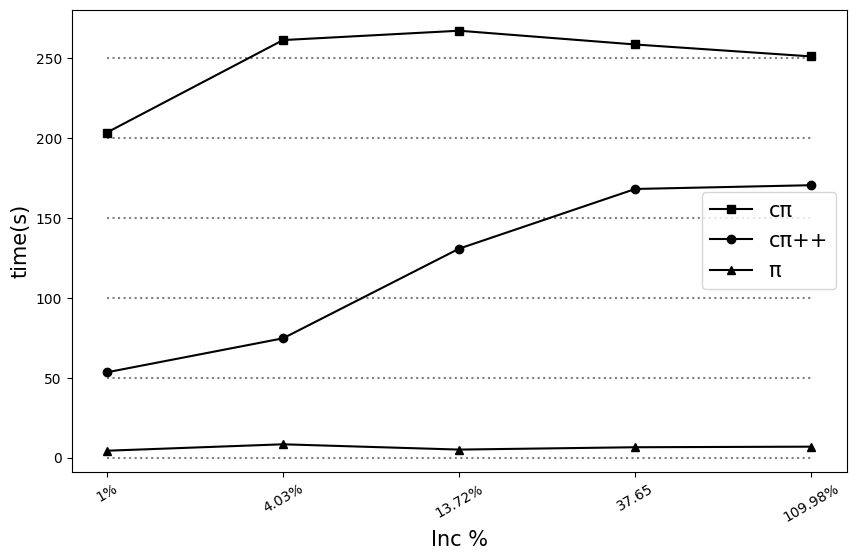

In [482]:
# Step 3: Plotting
plt.figure(figsize=(10, 6))

plt.hlines(y=[range(0,int(agg_df['cpi_repair_total_time'].max())+50,50)], xmin=0, xmax=4, colors='grey', linestyles='dotted')
# Plot each of the three variables
plt.plot(agg_df['Inc%'], agg_df['cpi_repair_total_time'], label='cπ', marker='s', color="black")
plt.plot(agg_df['Inc%'], agg_df['cpi_repair++_total_time'], label='cπ++', marker='o', color="black")
plt.plot(agg_df['Inc%'], agg_df['pi_repair_total_time'], label='π', marker='^', color="black")

plt.xticks(rotation=30, horizontalalignment="center")
# Adding plot title and labels
#plt.title('Repair time vs. Inc %', fontsize= 20)
plt.xlabel('Inc %', fontsize= 15)
plt.ylabel('time(s)', fontsize= 15)

# Add a legend to explain which line is which
plt.legend(fontsize= 15)

# Show the plot
plt.show()

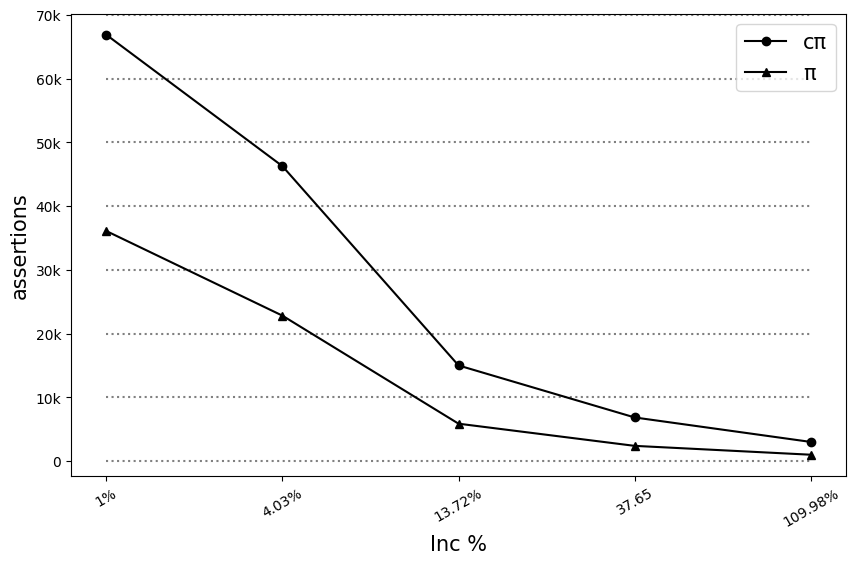

In [485]:
plt.figure(figsize=(10, 6))

plt.hlines(y=[range(0,max(agg_df['pi_repair_size'].max(),agg_df['cpi_repair++_size'].max())+10000,10000)], xmin=0, xmax=4, colors='grey', linestyles='dotted')

plt.plot(agg_df['Inc%'], agg_df['cpi_repair++_size'], label='cπ', marker='o', color="black")
plt.plot(agg_df['Inc%'], agg_df['pi_repair_size'], label='π', marker='^', color="black")

plt.xticks(rotation=30, horizontalalignment="center")
# Adding plot title and labels
#plt.title('Repair size vs. Inc %', fontsize= 20)
plt.xlabel('Inc %', fontsize= 15)
plt.ylabel('assertions', fontsize= 15)

# Add a legend to explain which line is which
plt.legend(fontsize= 15)

# Apply the formatter
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))

# Show the plot
plt.show()

In [560]:
df_pos = pd.read_csv('u1_pos_results.csv', sep=';')

In [561]:
df_pos = df_pos.drop(columns=["ABOX", "TBOX", "POS", "ABox_load_time", "Conflicts_size", "Conflicts_time", "pi_repair_time", "cl-ABox_size", "cl-ABox_time", "cpi_repair++_time"])

In [562]:
df_pos.head()

,POS_size,POS_density,ABox_size,pi_repair_size,pi_repair_total_time,cl_pi_repair_size,cpi_repair++_size,cpi_repair++_total_time,only cpi-repair,cl(π)-repair
0,1000,0.1,75679,6458,5.025,9821,16279,164.729,0,16279
1,1000,0.1,75671,2394,5.248,4369,6763,191.593,0,6763
2,1000,0.1,75678,1985,4.722,3800,5785,202.356,0,5785
3,1000,0.2,75679,4067,5.730,6926,11009,180.899,16,10993
4,1000,0.2,75671,2941,6.802,5403,8344,187.228,0,8344


In [563]:
idx = df_pos.groupby('POS_density')["only cpi-repair"].idxmax()
agg_df = df_pos.loc[idx]

In [566]:
agg_df = agg_df.drop(index=27)

In [567]:
agg_df.head(11)

,POS_size,POS_density,ABox_size,pi_repair_size,pi_repair_total_time,cl_pi_repair_size,cpi_repair++_size,cpi_repair++_total_time,only cpi-repair,cl(π)-repair
30,500,0.1,75678,0,5.279,0,421,223.269,421,0
59,100,0.2,75679,2869,3.844,5178,8673,176.708,626,8047
60,100,0.3,75678,8774,3.452,12259,21702,140.990,669,21033
9,1000,0.4,75671,12628,7.583,15926,28554,135.967,0,28554
41,500,0.5,75679,11392,5.187,14748,26153,141.710,13,26140
15,1000,0.6,75678,14558,7.888,17341,31899,113.048,0,31899
18,1000,0.7,75671,16624,4.710,19230,35854,121.898,0,35854
21,1000,0.8,75678,17751,4.084,20092,37843,96.539,0,37843
24,1000,0.9,75671,12919,4.827,16238,29157,134.992,0,29157


In [568]:
df_plt = agg_df[['POS_density', 'pi_repair_size', 'cl(π)-repair', 'only cpi-repair']]
df_plt = df_plt.rename(columns={"pi_repair_size": "π", "cl(π)-repair": "cl(π)","only cpi-repair": "only cπ"})

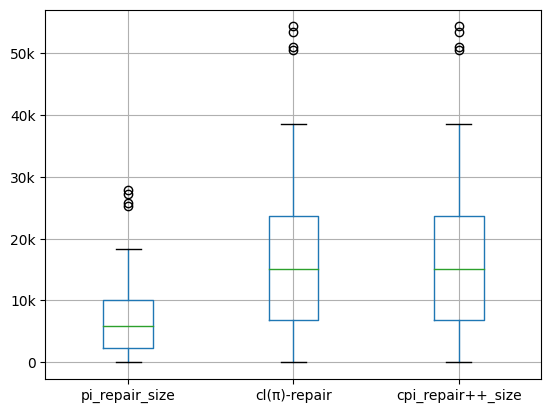

In [569]:
df = df_pos[['pi_repair_size', 'cl(π)-repair', 'cpi_repair++_size']]

plt.figure();

# Apply the formatter
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))

bp = df.boxplot()

<Figure size 1000x600 with 0 Axes>

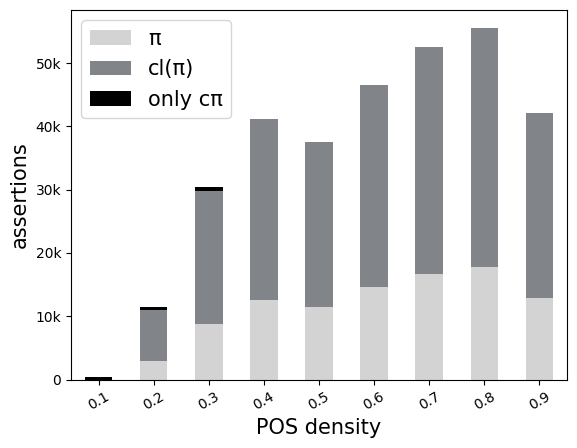

In [570]:
plt.figure(figsize=(10, 6))

df_plt.plot(x='POS_density', kind='bar', color=["#D3D3D3", "#818589","black"],  stacked=True)


plt.xticks(rotation=30, horizontalalignment="center")
# Adding plot title and labels
#plt.title('Repair size vs. POS density', fontsize= 20)
plt.xlabel('POS density', fontsize= 15)
plt.ylabel('assertions', fontsize= 15)

# Apply the formatter
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))

# Add a legend to explain which line is which
plt.legend(fontsize= 15)

# Show the plot
plt.show()

In [571]:
#agg_df2 = df_pos.groupby("POS_density").mean().reset_index()
idx2 = df_pos.groupby('POS_density')["pi_repair_size"].idxmax()
agg_df2 = df_pos.loc[idx2]

In [573]:
agg_df2.head(11)

,POS_size,POS_density,ABox_size,pi_repair_size,pi_repair_total_time,cl_pi_repair_size,cpi_repair++_size,cpi_repair++_total_time,only cpi-repair,cl(π)-repair
0,1000,0.1,75679,6458,5.025,9821,16279,164.729,0,16279
32,500,0.2,75671,27854,4.227,26468,54322,84.039,0,54322
6,1000,0.3,75679,14990,5.031,17802,32792,116.571,0,32792
9,1000,0.4,75671,12628,7.583,15926,28554,135.967,0,28554
41,500,0.5,75679,11392,5.187,14748,26153,141.710,13,26140
44,500,0.6,75671,25349,4.282,25150,50499,86.541,0,50499
47,500,0.7,75671,17335,4.355,19665,37000,122.772,0,37000
21,1000,0.8,75678,17751,4.084,20092,37843,96.539,0,37843
73,100,0.9,75671,25690,3.937,25236,50926,96.571,0,50926
27,1000,1.0,75671,27228,4.881,26137,53365,88.946,0,53365


In [576]:
agg_df2 = agg_df2.drop(index=27)

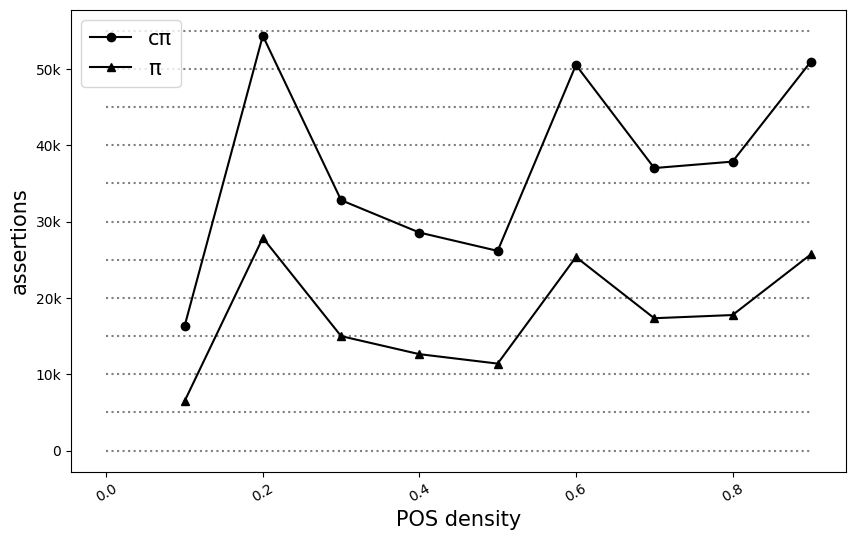

In [578]:
plt.figure(figsize=(10, 6))

plt.hlines(y=[range(0,int(agg_df2['cpi_repair++_size'].max())+5000,5000)], xmin=0, xmax=0.9, colors='grey', linestyles='dotted')

plt.plot(agg_df2['POS_density'], agg_df2['cpi_repair++_size'], label='cπ', marker='o', color="black")
plt.plot(agg_df2['POS_density'], agg_df2['pi_repair_size'], label='π', marker='^', color="black")

plt.xticks(rotation=30, horizontalalignment="center")
plt.xlabel('POS density', fontsize= 15)
plt.ylabel('assertions', fontsize= 15)

# Apply the formatter
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))

# Add a legend to explain which line is which
plt.legend(fontsize= 15)

# Show the plot
plt.show()

In [579]:
df_pos = pd.read_csv('u1_pos_results_more_confs.csv', sep=';')

In [580]:
df_pos["POS_size"] = [x.split("_")[0][3:] for x in df_pos["POS"]]

In [581]:
df_pos["POS_density"] = [x.split("_")[2][:3] for x in df_pos["POS"]]

In [582]:
df_pos = df_pos.drop(columns=["ABOX", "TBOX", "POS", "ABox_load_time", "Conflicts_size", "Conflicts_time", "pi_repair_time", "cl-ABox_size", "cl-ABox_time", "cpi_repair++_time"])

In [583]:
df_pos['cl(π)-repair'] = df_pos['cl_pi_repair_size'] - df_pos['pi_repair_size']
df_pos['only cpi-repair'] = df_pos['cpi_repair++_size'] - (df_pos['cl_pi_repair_size'] + df_pos['pi_repair_size'])

In [589]:
df_pos.head(62)

,ABox_size,pi_repair_size,pi_repair_total_time,cl_pi_repair_size,cpi_repair++_size,cpi_repair++_total_time,POS_size,POS_density,cl(π)-repair,only cpi-repair
0,75718,0,4.554,0,0,142.229,100,0.1,0,0
1,75718,0,3.579,0,0,144.954,100,0.2,0,0
2,75718,0,3.643,0,0,144.931,100,0.3,0,0
3,75718,1520,3.246,2923,4443,131.245,100,0.4,1403,0
4,75718,0,3.304,0,0,141.725,100,0.5,0,0
5,75718,1488,3.252,2861,4349,135.538,100,0.6,1373,0
6,75718,0,3.760,0,0,144.845,100,0.7,0,0
7,75718,1507,3.534,3009,4516,130.662,100,0.8,1502,0
8,75718,1481,3.167,2797,4278,131.534,100,0.9,1316,0
9,75718,1478,3.188,2945,4423,130.289,100,1.0,1467,0


In [585]:
idx = df_pos.groupby('POS_density')["only cpi-repair"].idxmax()
agg_df = df_pos.loc[idx]

In [586]:
df_plt = agg_df[['POS_density', 'pi_repair_size', 'cl(π)-repair', 'only cpi-repair']]
df_plt = df_plt.rename(columns={"pi_repair_size": "π", "cl(π)-repair": "cl(π)","only cpi-repair": "only cπ"})

In [587]:
df_plt.head(11)

,POS_density,π,cl(π),only cπ
20,0.1,0,0,44
1,0.2,0,0,0
2,0.3,0,0,0
3,0.4,1520,1403,0
4,0.5,0,0,0
5,0.6,1488,1373,0
6,0.7,0,0,0
7,0.8,1507,1502,0
8,0.9,1481,1316,0
9,1.0,1478,1467,0


<Figure size 1000x600 with 0 Axes>

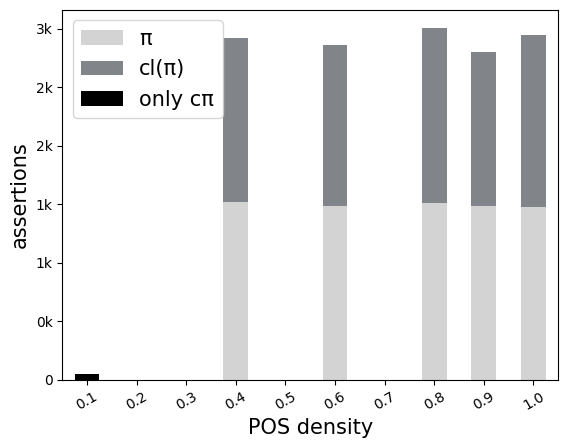

In [588]:
plt.figure(figsize=(10, 6))

df_plt.plot(x='POS_density', kind='bar', color=["#D3D3D3", "#818589","black"],  stacked=True)


plt.xticks(rotation=30, horizontalalignment="center")
# Adding plot title and labels
#plt.title('Repair size vs. POS density', fontsize= 20)
plt.xlabel('POS density', fontsize= 15)
plt.ylabel('assertions', fontsize= 15)

# Apply the formatter
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))

# Add a legend to explain which line is which
plt.legend(fontsize= 15)

# Show the plot
plt.show()